In [192]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

columns = ['N', 'l', 'I', 'Nan' ]
df = pd.read_csv('D:\\Учёба\\нтц уп ран\\C60F\\raman_to_process\\3 Gpa_405_50s_2sum_02mW.csv',
                 delimiter=',', header=None, skiprows=1, names=columns, decimal=',')

df1 = df[['l', 'I']]
df1 = df1.loc[df1['l'] > 500]

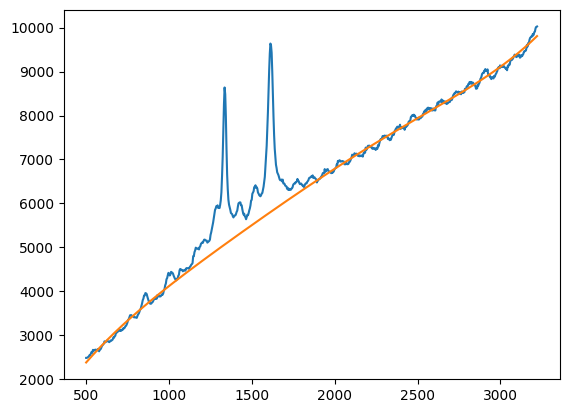

In [378]:
plt.plot(df1['l'], df1['I'])
n = 5
df2 = df1.query('l<1000 or l>2000')
cof = np.polyfit(df2['l'],df2['I'], n)
plt.plot(df1['l'], [sum([math.pow(x, n - i) * cof[i] for i in range(n+1)]) for x in df1['l']])

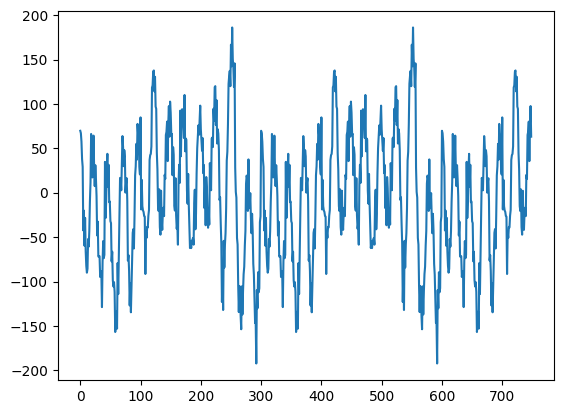

In [379]:
df3 = pd.DataFrame()
df3['I'] = df1['I'] - [sum([math.pow(x, n - i) * cof[i] for i in range(n+1)]) for x in df1['l']]
df3['l'] = df1['l']
val4 = np.array(df3.iloc[400:700]['I'])
val5= np.append(val4, val4)
val5= np.append(val5, val4[:149])
val5.shape
plt.plot(val5)

In [380]:
Ampl = np.fft.fft(val5)
frq = np.fft.fftfreq(Ampl.shape[0])
tfr = np.array([frq, Ampl])

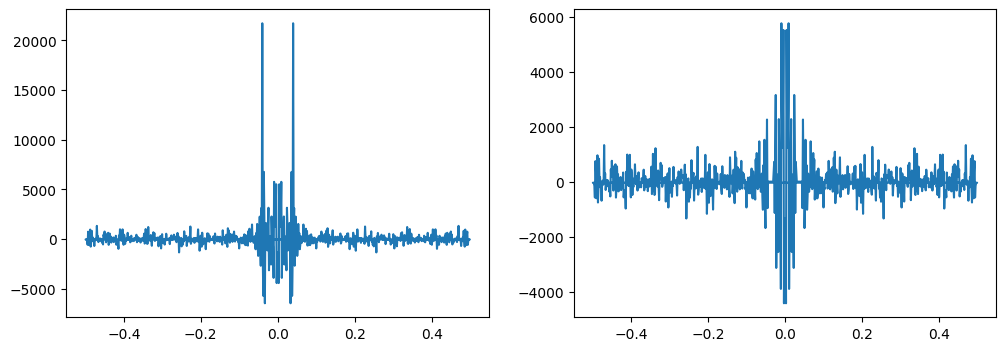

In [390]:
center = frq[np.argmax(np.abs(Ampl))]
bord = 0.005
u_b, l_b = center + bord, center - 2 * bord
tfr1 = np.where(((tfr[0]<l_b) + (tfr[0]>u_b)) * ((tfr[0]>-l_b) + (tfr[0]<-u_b)), tfr, np.array([frq, np.zeros(749)]))
# tfr1 = np.where((tfr[0]>u_b) + (tfr[0]<-u_b), tfr, np.array([frq, np.zeros(749)]))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(tfr[0], np.real(tfr[1]))
axes[1].plot(tfr1[0], np.real(tfr1[1]))

In [391]:
# spec fourier transform
sp_ampl = np.fft.fft(df3['I'])
sp_frq = np.fft.fftfreq(sp_ampl.shape[0])
sp_tfr = np.array([sp_frq, sp_ampl])
# correction
sp_ampl_corr = np.where(((sp_tfr[0] < l_b) + (sp_tfr[0] > u_b)) * ((sp_tfr[0] > -l_b) + (sp_tfr[0] < -u_b)),
                        sp_tfr, np.array([frq, np.zeros(749)]))
# inverse transform
corr_signal = np.fft.ifft(sp_ampl_corr[1])
# corr_signal = np.fft.ifft(sp_ampl)

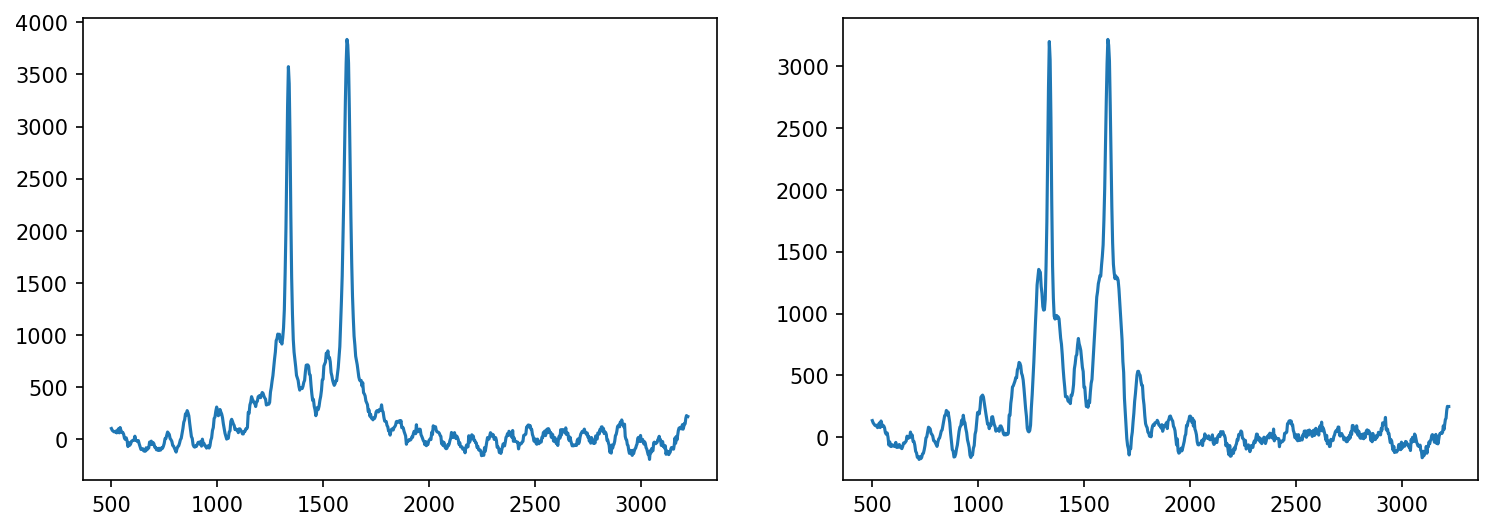

In [393]:
fig1 = plt.figure(figsize=(12, 4), dpi=150)
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)
ax2.plot(df3['l'], corr_signal)
ax1.plot(df3['l'], df3['I'])